## Dataset used: [Sales-Prediction.csv](https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input)

# Load and Inspect the data:

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('advertising.csv')

In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Data Visualization:

### Pairplot to visualise Sales pattern among TV,Radio,Newspaper

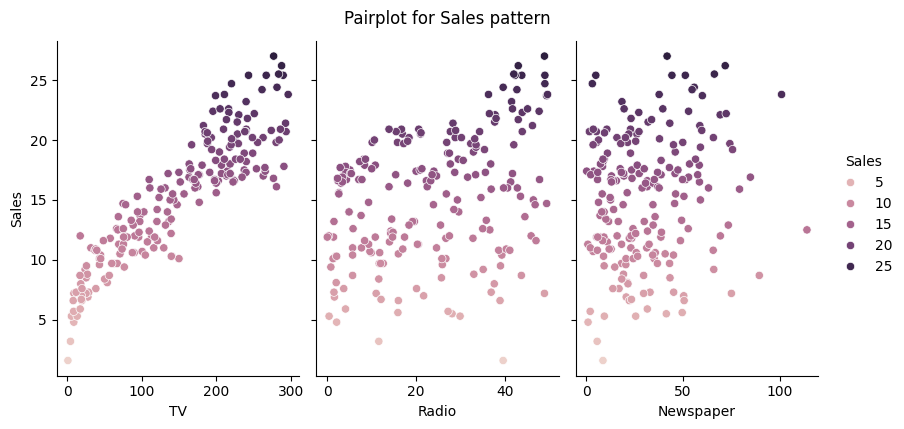

In [28]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.7, kind='scatter', hue='Sales')
plt.suptitle('Pairplot for Sales pattern',y=1.05)
plt.show()

### Correlation matrix heatmap to visualize the correlation coefficients between variables:

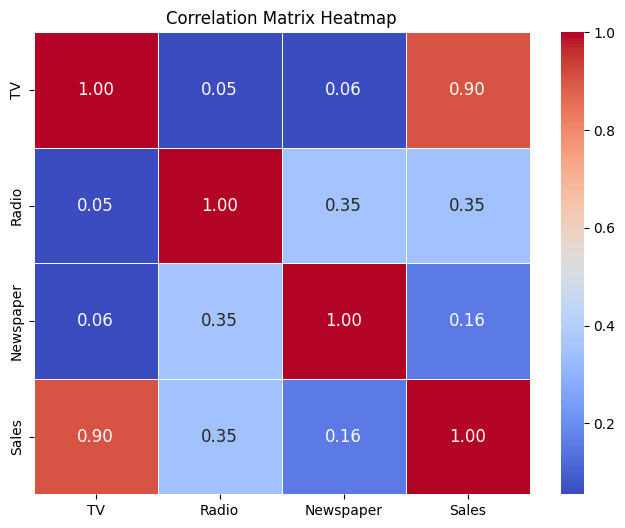

In [14]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12}, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Distribution Plots to vusialise the distributions of TV, Radio, Newspaper, and Sales:

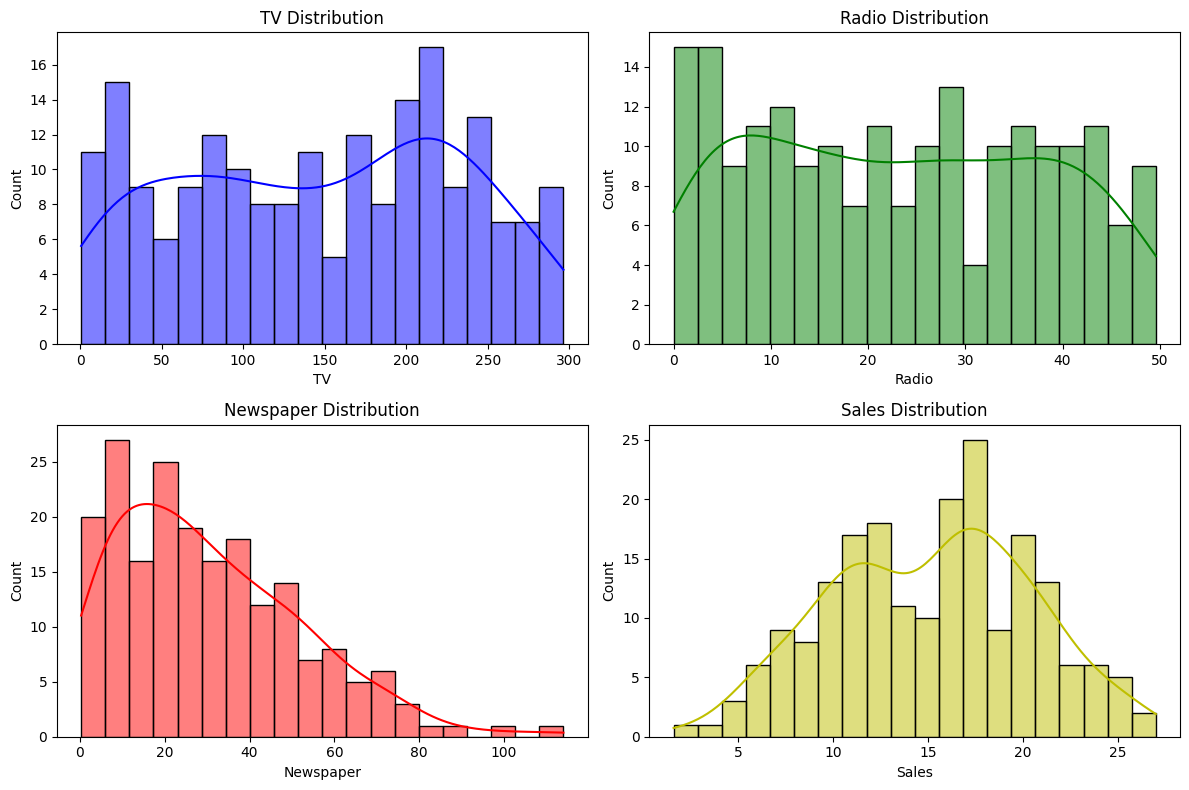

In [30]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['TV'], bins=20, kde=True, color='b')
plt.title('TV Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Radio'], bins=20, kde=True, color='g')
plt.title('Radio Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Newspaper'], bins=20, kde=True, color='r')
plt.title('Newspaper Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Sales'], bins=20, kde=True, color='y')
plt.title('Sales Distribution')

plt.tight_layout()
plt.show()

# Split the Data into Training and Testing Sets:

In [34]:
x = df.drop(columns='Sales')

In [35]:
y = df['Sales']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### Linear Regression:

In [39]:
model = LinearRegression()

In [40]:
model.fit(x_train,y_train)

LinearRegression()

# Prediction: 

In [41]:
pred = model.predict(x_test)

In [43]:
pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [46]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

In [47]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1.2748262109549338
Mean Squared Error: 2.9077569102710896
Root Mean Squared Error: 1.7052146229349223


In [49]:
accuracy_score=model.score(x_test,y_test)*100

In [50]:
print(f"Accuracy of the model: {accuracy_score}%")

Accuracy of the model: 90.59011844150827%


In [65]:
new_data = pd.DataFrame([[100, 20, 30]], columns=['TV', 'Radio', 'Newspaper']) #testing sample (random) data
predicted_sales = model.predict(new_data)
print(f'Predicted Sales: {predicted_sales}')

Predicted Sales: [12.31406014]


# Conclusion:

### The linear regression model demonstrated reasonable performance in predicting sales based on the chosen advertising channels. Evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) indicated that the model effectively captured the relationships between advertising expenditures and sales.

#### Residuals Plot:
- ##### A residuals plot helps visualize the distribution of residuals (differences between actual and predicted values) to assess the goodness-of-fit of your model.

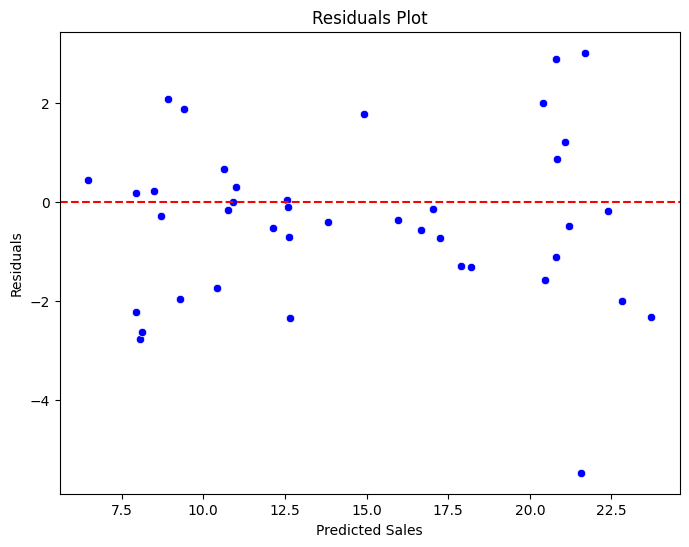

In [62]:
residuals = y_test - pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pred, y=residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()

#### Regression Line Plot: 
- ##### This plot helps assess how closely the predicted sales match the actual sales, providing a visual indication of the model's accuracy.

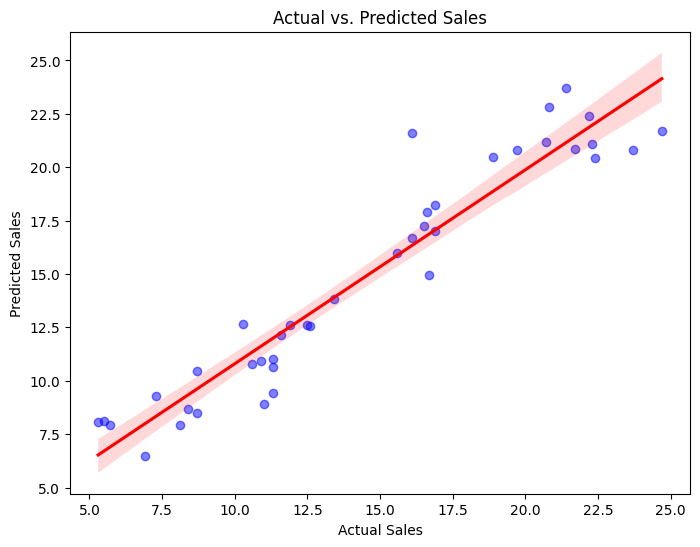

In [67]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=pred, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()